In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from zlib import crc32
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [6]:
#function to download and extract the data


import os    #to work with the operating system
import tarfile   #to work with tarfile
import urllib   #for working with urls

dataUrl='https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.tgz'  #from where to get data

dataPath=os.path.join('datasets','housing')  #path of directory to store data

def fetch_data(data_url=dataUrl,data_path=dataPath):
    os.makedirs(data_path,exist_ok=True)              #make directory as data_path
    file_path=os.path.join(data_path,'housing.tgz')   #make file path to store file
    urllib.request.urlretrieve(data_url,file_path)    #open,read and retieve the url
    open_data=tarfile.open(file_path)                 #open the file
    open_data.extractall(path=data_path)              #extract all the files in tar tile
    open_data.close()                                 #close the opened tar file
# fetch_data()
    

In [7]:
#Load the data using pandas

import pandas as pd

def load_data():
    file_path=os.path.join(dataPath,'housing.csv')
    return pd.read_csv(file_path)
housing=load_data()

In [8]:
housing.head()  #to see top five rows in the datasets

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
housing.info()  #to see the detail info of the datasets

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
housing['ocean_proximity'].value_counts()   #to see number of data according to the categories

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [11]:
housing.describe()   #insights for numerical data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


[]

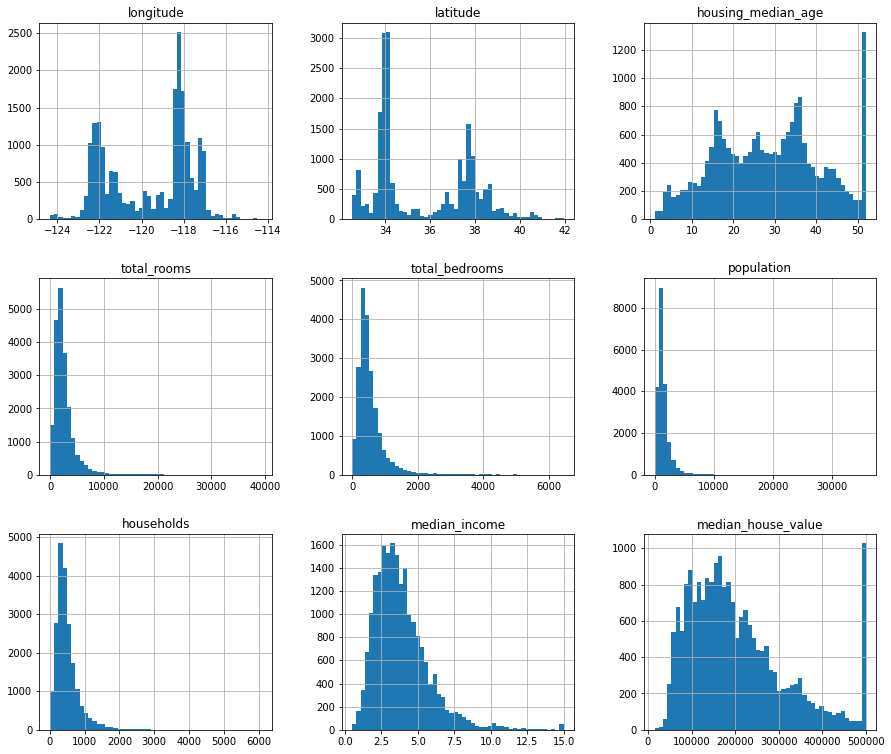

In [12]:
%matplotlib inline
housing.hist(bins=50,figsize=(15,13))
plt.plot()

# Generating the test set

In [13]:
# to make this notebook's output identical at every run
np.random.seed(42)

In [14]:
                    
                    #By randomly shuffling the dataset (random sampling)
        
# def split_data(data,test_ratio):
#     shuffled_indices=np.random.permutation(len(data)) #randomly shuffle 'np.arrange()'[evenly placed number] and creates a list of shuffled number upto the given number
#     test_set_size=int(len(data)*test_ratio)  #size of test set
#     test_indices=shuffled_indices[:test_set_size]  #make test indices as upto test_set_size in shuffled indices
#     train_indices=shuffled_indices[test_set_size:]  #make train indices as other than the test indices
#     return data.iloc[train_indices], data.iloc[test_indices]  #return the dataframe for train and test set

# train_set, test_set=split_data(housing,0.2)
# print(len(train_set))
# print(len(test_set))

In [15]:
                                    #By generating the hash identifier for each instance  (random sampling)
    


# def test_set_check(identifier, test_ratio):
#     return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32  #return the 32 bit checksum for the given

# def split_train_test_by_id(data,test_ratio,id_column):
#     ids=data[id_column]      #gives the id column of dataframe
#     in_test_set =ids.apply(lambda id_:test_set_check(id_, test_ratio))
#     return data.loc[~in_test_set],data.loc[in_test_set]     #return the training set and test set

# housing_with_id=housing.reset_index()   #adds index column

# train_set, test_set =split_train_test_by_id(housing_with_id,0.2,'index')
# print(len(train_set))
# print(len(test_set))


    

In [16]:
                        #Using scikit learn  (random sampling)
    
# from sklearn.model_selection import train_test_split

# train_set, test_set=train_test_split(housing, test_size=0.2, random_state=42)

# print(len(train_set))
# print(len(test_set))

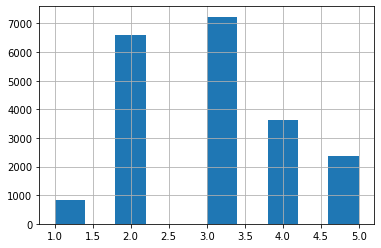

In [17]:
                        #for stratifying the median income(as it is most imp attribute to predict)
    
housing['income_cat']=pd.cut(housing['median_income'],bins=[0.,1.5,3.,4.5,6.,np.inf],labels=[1,2,3,4,5])

housing['income_cat'].hist()
plt.show()

In [18]:
                    #for stratified sampling using Scikit-learn

split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]
    

print(len(strat_train_set))
print(len(strat_test_set))

#strat_test_set['income_cat'].value_counts()/len(strat_test_set)  #checks the proportion of income category in the stratified test set


16512
4128


In [19]:
                #to remove the income_cat attribute 

for i in (strat_train_set, strat_test_set):
    i.drop('income_cat',axis=1,inplace=True)


# VISUALIZING THE DATA

In [20]:
housing=strat_train_set.copy()  #make a copy of train_set to visualize the data

## ==>>visualizing the geographical data

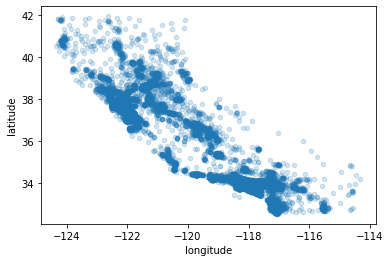

In [21]:
housing.plot(x='longitude',y='latitude',kind="scatter",alpha=0.2)
plt.show()

## ==>> visualizing population and housing price along with geography

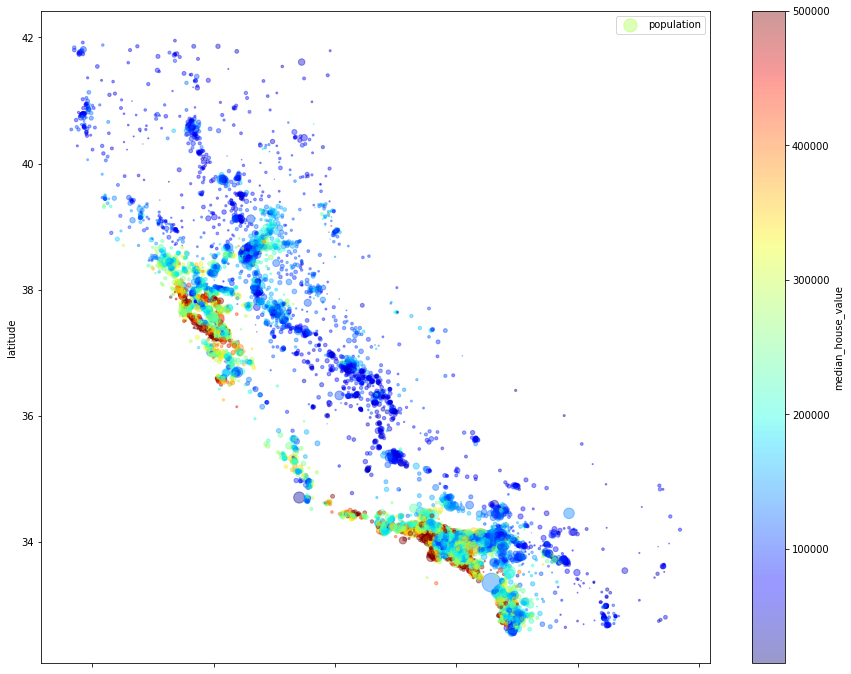

In [22]:
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.4,
             s=housing['population']/100,label="population",figsize=(15,12),   
            c='median_house_value',cmap=plt.get_cmap("jet"),colorbar=True)    #to get population and housing price in the geographical graph
plt.legend()
plt.show()

## ==>> looking for correlations

In [23]:
                        #see correlation of housing price with other atrributes
corr_matrix=housing.corr()
# print(corr_matrix)
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

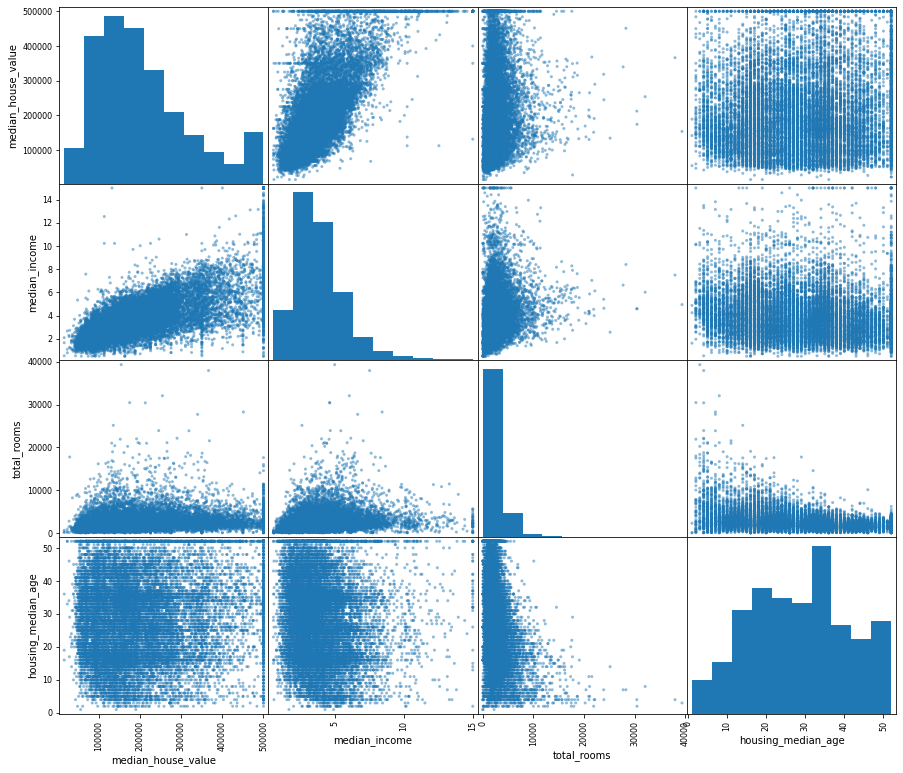

In [24]:
                        #see relation of every with every other
attributes=['median_house_value','median_income','total_rooms','housing_median_age']
scatter_matrix(housing[attributes],figsize=(15,13))
plt.show()

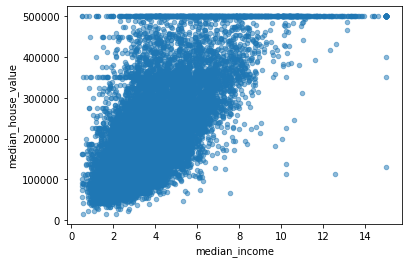

In [25]:
                    #see relation of housing price with median income(most promising attribute)
housing.plot(kind="scatter",x='median_income',y='median_house_value',alpha=0.5)
plt.show()

## ==>> experimenting with attribute combinations

In [26]:
housing['rooms_per_household']=housing['total_rooms']/housing['households']
housing['bedrooms_per_room']=housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household']=housing['population']/housing['households']

corr_matrix=housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

# PREPARE THE DATA FOR MACHINE LEARNING ALGORITHM

## ==>> separate the target attribute and other attributes

In [27]:
housing=strat_train_set.drop('median_house_value',axis=1)  #create a copy of other attributes without the target attribute
housing_labels=strat_train_set["median_house_value"].copy()  #create a copy of attribute of labels

# print(housing.head())
# print(housing_labels.head())

## ==>>cleaning data( adding missing values, median)

In [28]:
                    #using pandas (for only bedrooms)

# median=housing['total_bedrooms'].median()
# housing['total_bedrooms'].fillna(median,inplace=True)

In [29]:
                    #from scikit learn (for all missing values)
imputer=SimpleImputer(strategy='median')   #create a instance of SimpleImputer
housing_num=housing.drop('ocean_proximity',axis=1)  #get only dataset of numerical values attribute
imputer.fit(housing_num)   #computes the median for each attribute and stores the result in statistics_ variable

# imputer.statistics_

X=imputer.transform(housing_num)  #transform the dataset

housing_tr=pd.DataFrame(X,columns=housing_num.columns,index=housing.index)  #put into the pandas dataframe


## ==>> handling text and categorical attributes

In [30]:
                    #using OrdinalENcoding

housing_cat=housing[['ocean_proximity']] #double brackets because fit_transform() wants 2-D array
# # housing_cat.head(10)

# ordinal_encoder=OrdinalEncoder()
# housing_cat_encoded=ordinal_encoder.fit_transform(housing_cat)
# housing_cat_encoded[:10]
# ordinal_encoder.categories_


In [31]:
                #using OneHotEncoder

cat_encoder=OneHotEncoder()
housing_cat_1hot=cat_encoder.fit_transform(housing_cat)
# housing_cat_1hot
# housing_cat_1hot.toarray()
# cat_encoder.categories_

## ==>> custom transformers

In [32]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix=3,4,5,6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self,add_bedrooms_per_room=True):
        self.add_bedrooms_per_room=add_bedrooms_per_room
        
    def fit(self,X):
        return self
    
    def transform(self, X):
        rooms_per_household=X[:,rooms_ix]/X[:,households_ix]
        population_per_household=X[:,population_ix]/X[:,households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room=X[:,bedrooms_ix]/X[:,rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder=CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs=attr_adder.transform(housing.values)

## ==>>transformation pipelines

In [33]:
            #Also, housing_extra_attribs is a NumPy array, 
            #we've lost the column names (unfortunately, that's a problem with Scikit-Learn).
            #To recover a DataFrame, you could run this:

housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN,4.625369,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN,6.00885,2.707965
14650,-117.2,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN,4.225108,2.025974
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND,5.232295,4.135977
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN,4.50581,3.047847


In [34]:
                        #Pipeline class (for numerical attributes only)

num_pipeline=Pipeline([
                      ('imputer',SimpleImputer(strategy='median')),
                      ('attribs_adder',CombinedAttributesAdder()),
                      ('std_scaler',StandardScaler())
                      ])

housing_num_tr=num_pipeline.fit_transform(housing_num)

In [35]:
                        #ColumnTranformer class (for transformation of both categorical and numerical attributes)

num_attribs=list(housing_num)
# list(housing_num)
cat_attribs=['ocean_proximity']
full_pipeline=ColumnTransformer([('num',num_pipeline,num_attribs),
                                ('cat',OneHotEncoder(),cat_attribs)
                                ])
housing_prepared=full_pipeline.fit_transform(housing)

# SELECT AND TRAIN A MODEL

## ==>>training and evaluating on the training set

In [36]:
                        #train a model using linear regression

lin_reg=LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)

                        #compare it with the labels using some part of training set

some_data = housing.iloc[:5]  # take first five rows of housing (0 to 4)
some_labels = housing_labels.iloc[:5] #take labels of above four data
some_data_prepared = full_pipeline.transform(some_data)  #transform the data

print("Predictions:", lin_reg.predict(some_data_prepared)) #predict the label
print('Labels:',list(some_labels))  #actual label

                    #calculate rmse
housing_predictions=lin_reg.predict(housing_prepared)
lin_mse=mean_squared_error(housing_labels,housing_predictions)
lin_rmse=np.sqrt(lin_mse)
print(lin_rmse)

Predictions: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]
68628.19819848923


In [37]:
                        #train a model with DecisionTreeRegressor

tree_reg=DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_labels)

                    #calculate rmse
housing_predictions=tree_reg.predict(housing_prepared)
tree_mse=mean_squared_error(housing_labels,housing_predictions)
tree_rmse=np.sqrt(tree_mse)
print(tree_rmse)



0.0


## ==>>better evaluation using cross validation

In [38]:
#function to display scores,mean,standard deviation
def display_scores(score):
    print("Scores:",score)
    print("Mean:",score.mean())
    print("Standard deviation:",score.std())

                #calculate cross validation for decision tree
scores=cross_val_score(tree_reg,housing_prepared,housing_labels,scoring='neg_mean_squared_error',cv=10)
tree_rmse_score=np.sqrt(-scores) #calculate the rmse(list of rmse error for 10 trainings)
print(display_scores(tree_rmse_score))


Scores: [68238.05196774 66817.04578495 70753.16954743 69884.28682243
 70568.69371449 74169.72026563 71656.23162198 70466.17619771
 76555.53603628 69481.84893535]
Mean: 70859.07608940084
Standard deviation: 2652.359918121003
None


In [39]:
                #calculate cross validation for linear regression
scores=cross_val_score(lin_reg,housing_prepared,housing_labels,scoring='neg_mean_squared_error',cv=10)
lin_rmse_score=np.sqrt(-scores) #calculate the rmse(list of rmse error for 10 trainings)
print(display_scores(lin_rmse_score))


Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345083
Standard deviation: 2731.674001798342
None


In [40]:
                   #train model for random forest
forest_reg=RandomForestRegressor()
forest_reg.fit(housing_prepared,housing_labels)

                    #calculate rmse
housing_predictions=forest_reg.predict(housing_prepared)
forest_mse=mean_squared_error(housing_labels,housing_predictions)
forest_rmse=np.sqrt(forest_mse)
# print(forest_rmse)

                    #calculate cross validation for linear regression
scores=cross_val_score(forest_reg,housing_prepared,housing_labels,scoring='neg_mean_squared_error',cv=10)
forest_rmse_score=np.sqrt(-scores) #calculate the rmse(list of rmse error for 10 trainings)
# print(display_scores(forest_rmse_score))


# FINE TUNE THE MODEL

## ==>> grid search

In [44]:
param_grid=[
    {'n_estimators':[3,10,30],'max_features':[2,4,6,8]},
    {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]}
]

forest_reg=RandomForestRegressor()

grid_search=GridSearchCV(forest_reg,param_grid,cv=5,scoring='neg_mean_squared_error',
                        return_train_score=True)

grid_search.fit(housing_prepared,housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [45]:
grid_search.best_params_  #to get the best parameters after tuning

{'max_features': 6, 'n_estimators': 30}

In [46]:
grid_search.best_estimator_  ##to get the best estimators after tuning

RandomForestRegressor(max_features=6, n_estimators=30)

In [47]:
cvres=grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"],cvres["params"]):
    print(np.sqrt(-mean_score),params)

64137.24966232572 {'max_features': 2, 'n_estimators': 3}
55363.32271489049 {'max_features': 2, 'n_estimators': 10}
52526.028303608204 {'max_features': 2, 'n_estimators': 30}
59920.012082685775 {'max_features': 4, 'n_estimators': 3}
53043.18301210728 {'max_features': 4, 'n_estimators': 10}
50845.36212635268 {'max_features': 4, 'n_estimators': 30}
58850.35306731417 {'max_features': 6, 'n_estimators': 3}
52022.03071831019 {'max_features': 6, 'n_estimators': 10}
50092.559626087364 {'max_features': 6, 'n_estimators': 30}
59375.05231779567 {'max_features': 8, 'n_estimators': 3}
52201.78917687376 {'max_features': 8, 'n_estimators': 10}
50165.494210663775 {'max_features': 8, 'n_estimators': 30}
62852.585275858175 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54004.48982089304 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60075.115119613896 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53208.46634917315 {'bootstrap': False, 'max_features': 3, 'n_estimator